<a href="https://colab.research.google.com/github/yudiyp/Tugas-Python/blob/main/Python%2011%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls

 0E59872A-67F4-4B02-B7D5-75ADAD7A5F85.jpeg
'1101194271_Muhammad Yudi Pratama.docx'
'1101194271_Muhammad Yudi Pratama.gdoc'
'1101194271_Muhammad Yudi Pratama.pdf'
'1101194271 Registrasi _ Telkom University Muhammad Yudi Pratama.pdf'
 3877D139-6251-4A78-A727-8CD44F6E8F4A.png
 3A916124-1549-4A4B-AB84-D0F76BD2CB13.png
 3C54C994-46E0-48DA-981E-7DC12BA35B2E.jpeg
 43479.jpg
 43484.jpg
 539DD81B-36D2-4334-8E44-7173879742A1.png
 5A234C9E-566E-4427-8051-4CEBC389112C.jpeg
 6083AE7F-5CC0-4443-8C44-152780152E08.png
 8F8265C3-3F7A-4958-9236-BFD58D887E33.jpeg
'Annotation 2020-08-25 184132.png'
 B0260817-A018-40D4-BF77-E12B3A7FE2DB.png
 BC1FE79D-CCA8-48EB-B8E6-DA8535B9F4C3.jpeg
 C979BF59-05E3-4F98-BB6D-3FBA0AD3CABB.jpeg
'CamScanner 09-04-2020 15.34.32.pdf'
 Classroom/
'Colab Notebooks'/
 D10E2863-8FA3-4E62-B89D-ADB430CD0288.jpeg
 dataset/
 E570DAF9-01BC-488D-AB64-BDF0715BC79F.jpeg
 F8B95E98-9E9D-4EE0-958B-119D81F8459F.png
'FLOWCHART BANK DASKOM.drawio'
'Flowchart TUBES (1).drawio'
'Hasil Sertifikat Pe

In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10', 'GMB_10',

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [10]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(439, 240, 240, 3)
(147, 240, 240, 3)


In [11]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(240,240,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 107648)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               10764900  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [12]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [13]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 17s 1s/step - loss: 4.9980 - accuracy: 0.2096 - val_loss: 1.6393 - val_accuracy: 0.1701
Epoch 2/25
14/14 [==============================] - 17s 1s/step - loss: 1.6094 - accuracy: 0.2096 - val_loss: 1.5577 - val_accuracy: 0.5238
Epoch 3/25
14/14 [==============================] - 17s 1s/step - loss: 1.3661 - accuracy: 0.5421 - val_loss: 1.3625 - val_accuracy: 0.4150
Epoch 4/25
14/14 [==============================] - 17s 1s/step - loss: 0.7979 - accuracy: 0.7380 - val_loss: 1.0295 - val_accuracy: 0.6803
Epoch 5/25
14/14 [==============================] - 17s 1s/step - loss: 0.4368 - accuracy: 0.8405 - val_loss: 0.7180 - val_accuracy: 0.7619
Epoch 6/25
14/14 [==============================] - 17s 1s/step - loss: 0.2396 - accuracy: 0.9339 - val_loss: 0.7143 - val_accuracy: 0.7211
Epoch 7/25
14/14 [==============================] - 17s 1s/step - loss: 0.1096 - accuracy: 0.9932 - val_loss: 0.5959 - val_accuracy: 0.7891
Epoch 8/25
14/14 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


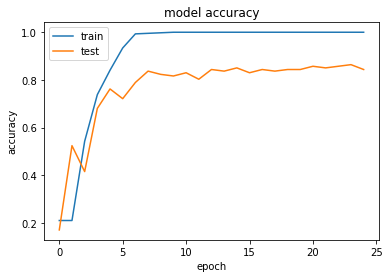

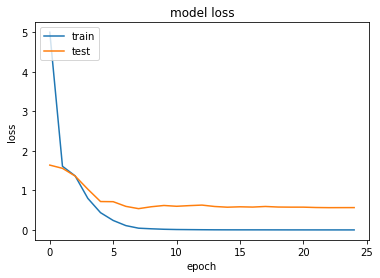

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.89      0.96      0.92        25
      GMB_05       0.76      0.84      0.80        31
      GMB_07       0.71      0.71      0.71        31
      GMB_08       0.93      0.90      0.92        31
      GMB_10       0.96      0.83      0.89        29

    accuracy                           0.84       147
   macro avg       0.85      0.85      0.85       147
weighted avg       0.85      0.84      0.84       147



In [16]:
model.save('nnmodel_daun')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun/assets


In [17]:
import cv2
import matplotlib.pyplot as plt
image1='testing.jpg'

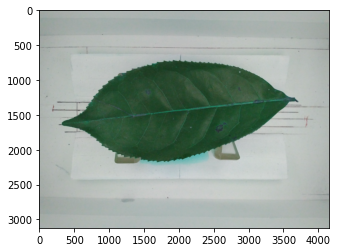

In [18]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [19]:
image_testing = Image.open('testing.jpg')
image_testing = np.array(image_testing.resize((240, 240))) / 255.0
image_testing.shape

(240, 240, 3)

In [20]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 240, 240, 3)


In [22]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.2327132e-05 8.0402094e-01 1.6737494e-01 4.1065663e-03 2.4485255e-02]]
['GMB_05']
